# <center>决策树</center>

这一章你将会学习一个流行的机器学习算法-决策树

导入指定库:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [1]:
import numpy as np 
import pandas 
from sklearn.tree import DecisionTreeClassifier

现在我们简单介绍一下数据集，我们使用的是一个名为skulls.csv的数据集，包括来自5个不同年代的埃及头骨的测量数据.

<img src = "https://ibm.box.com/shared/static/02z8krlr99hwrqa2ecx3ycuiwqkcuzjv.png", align = 'left'>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<b>epoch</b> - 头骨的年代，分为4000BC，3300BC，1850BC，200BC和AD150等不同的年代。这些年份这是大约估算的。

<b>mb</b> - 头骨最大宽度.

<b>bh</b> - 头顶到颅底的高度.

<b>bl</b> - 下颚到颅底的长度.

<b>nh</b> - 鼻骨的高度.

---

In [2]:
my_data = pandas.read_csv("resources/data/skulls.csv", delimiter=",")

In [3]:
my_data

,Unnamed: 0,epoch,mb,bh,bl,nh
0,1,c4000BC,131,138,89,49
1,2,c4000BC,125,131,92,48
2,3,c4000BC,131,132,99,50
3,4,c4000BC,119,132,96,44
4,5,c4000BC,136,143,100,54
5,6,c4000BC,138,137,89,56
6,7,c4000BC,139,130,108,48
7,8,c4000BC,125,136,93,48
8,9,c4000BC,131,134,102,51
9,10,c4000BC,134,134,99,51


用<b>my_data</b>读取来自skulls.csv的数据。声明以下变量
<ul>
    <li> <b> X </b> 作为 <b> 特征矩阵 </b> (就是my_data的数据) </li>

    
    <li> <b> Y </b> 作为 <b> 响应向量 (目标) </b> </li>

    
    <li> <b> targetNames </b>作为 <b> 响应向量名称列表(目标名称)</b> </li>
    
    
    <li> <b> featureNames </b> 作为 <b> 特征矩阵列名称列表 </b> </li>
   
</ul>

获得数据集的属性名列表

In [4]:
featureNames = list(my_data.columns.values)[2:6]
featureNames

['mb', 'bh', 'bl', 'nh']

清洗数据集，将数据集中不包含数值的目标列和表示序号的列删除

In [5]:
# Remove the column containing the target name since it doesn't contain numeric values.
# axis=1 means we are removing columns instead of rows.
X = my_data.drop(my_data.columns[[0,1]], axis=1).values
X[0:5]

array([[131, 138,  89,  49],
       [125, 131,  92,  48],
       [131, 132,  99,  50],
       [119, 132,  96,  44],
       [136, 143, 100,  54]])

列出不同的年代

In [6]:
targetNames = my_data["epoch"].unique().tolist()
targetNames

['c4000BC', 'c3300BC', 'c1850BC', 'c200BC', 'cAD150']

将年代值放入目标向量Y中

In [7]:
y = my_data["epoch"]
y[0:5]

0    c4000BC
1    c4000BC
2    c4000BC
3    c4000BC
4    c4000BC
Name: epoch, dtype: object

---
## 设置决策树
我们将从原始数据中分离出训练和测试数据。为此，我们需要借助sklearn.cross_validation的train_test_split方法

In [8]:
from sklearn.cross_validation import train_test_split

/Users/chenhaopeng/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<b> train_test_split </b> 会返回四个参数，我们将它们命名为:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
<b> train_test_split </b>需要如下参数: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
<b>X</b> 和 <b>y</b>表示分离之前的数据集，<b>test_size</b>表示测试数据的占比，<b>random_state</b>保证我们每次调用得到相同的分离结果。

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

输出X_trainset和 y_trainset的结构，确保维度相匹配。

In [10]:
#python2 print X_trainset.shape 
#python2 print y_trainset.shape
print (X_trainset.shape) 
print (y_trainset.shape)

(105, 4)
(105,)


输出X_testset 和 y_testset的结构，确保维度相匹配。

In [11]:
#python2 print X_testset.shape 
#python2 print y_testset.shape
print (X_testset.shape) 
print (y_testset.shape)

(45, 4)
(45,)


我们将先创建DecisionTreeClassifier（决策树分类器）的实例，赋值给skullsTree。

我们设置<i> criterion="entropy" </i>，这样能够得到每个节点的信息。

In [12]:
skullsTree = DecisionTreeClassifier(criterion="entropy")

现在我们用训练数据集 X_trainset 和 y_trainset 来进行训练。

In [13]:
skullsTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

训练完成的模型针对测试数据集X_testset进行预测

In [14]:
predTree = skullsTree.predict(X_testset)

如果想要对预测值和实际值做比较，那么可以打印出 <b>predTree</b> 和 <b>y_testset</b>

In [15]:
print(predTree [0:5])
print(y_testset [0:5])

['c3300BC' 'c4000BC' 'c1850BC' 'c200BC' 'c3300BC']
47    c3300BC
3     c4000BC
31    c3300BC
25    c4000BC
15    c4000BC
Name: epoch, dtype: object


接下来，从sklearn中导入metrics，检查我们的模型的准确性 

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: "), metrics.accuracy_score(y_testset, predTree)

DecisionTrees's Accuracy: 


(None, 0.2222222222222222)

然后，我们可以可视化生成的决策树

In [17]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

# for graphviz on windows
#import os     
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


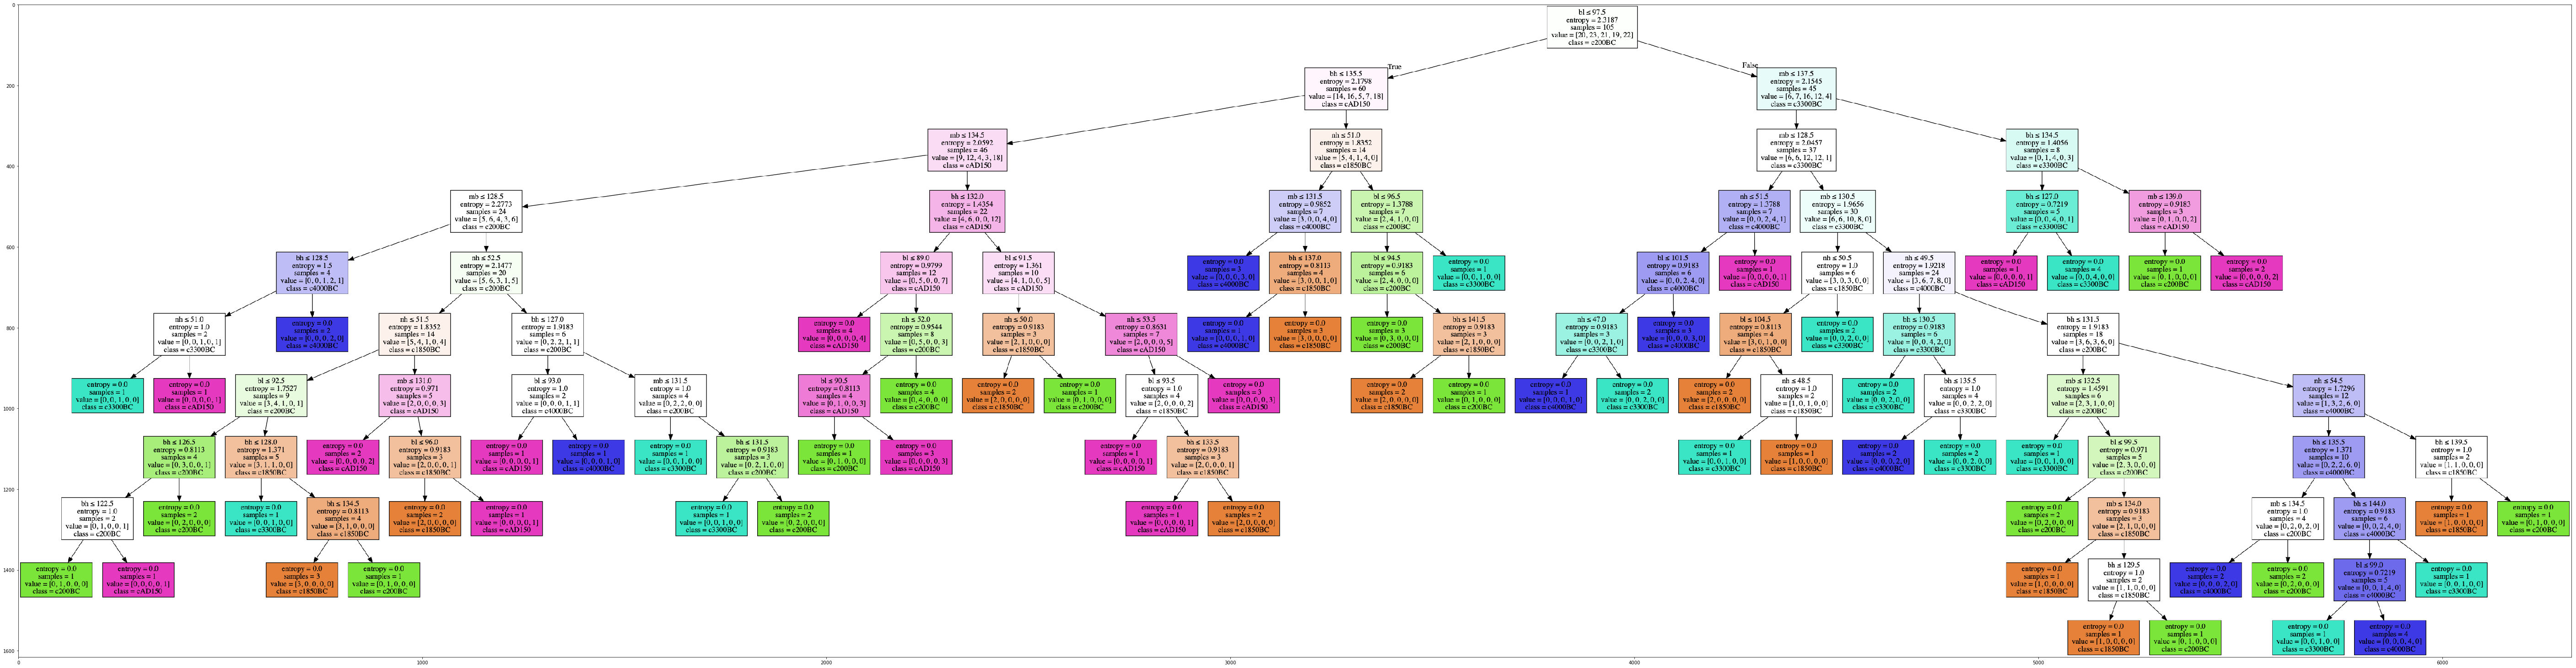

In [18]:
dot_data = StringIO()
filename = "skulltree.png"
out=tree.export_graphviz(skullsTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')